# Compare the performance of multi-class classification

## 1. on different level ( Order, Family, Genus0

## 2. using different features ( pvFam only, 4mer, only, codon only, all)

## 3. predicting order using prediction results on family level

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
work_dir = "../../Pipeline/MultiClass/"

In [69]:
stat_family = pd.read_csv(work_dir+'/Family/statistics.txt',sep = ' = ',header=None,names=['item','family'],engine='python')
stat_order = pd.read_csv(work_dir+'/Order/statistics.txt',sep = ' = ',header=None,names=['item','order'],engine='python')
stat_genus = pd.read_csv(work_dir+'/Genus/statistics.txt',sep = ' = ',header=None,names=['item','genus'],engine='python')
stat_order_by_family = pd.read_csv(work_dir+'/Family_on_order/statistics.txt',sep = ' = ',header=None,names=['item','order_by_family'],engine='python')

In [70]:
stat_order_4mer = pd.read_csv(work_dir+'/order_4mers/statistics.txt',sep = ' = ',header=None,names=['item','order_4mer'],engine='python')
stat_order_codon = pd.read_csv(work_dir+'/order_codon/statistics.txt',sep = ' = ',header=None,names=['item','order_codon'],engine='python')
stat_order_pvfam = pd.read_csv(work_dir+'/order_pvfam/statistics.txt',sep = ' = ',header=None,names=['item','order_pvfam'],engine='python')

In [71]:
stat_family_4mer = pd.read_csv(work_dir+'/family_4mers/statistics.txt',sep = ' = ',header=None,names=['item','family_4mer'],engine='python')
stat_family_codon = pd.read_csv(work_dir+'/family_codon/statistics.txt',sep = ' = ',header=None,names=['item','family_codon'],engine='python')
stat_family_pvfam = pd.read_csv(work_dir+'/family_pvfam/statistics.txt',sep = ' = ',header=None,names=['item','family_pvfam'],engine='python')

In [72]:
result = pd.merge(stat_order,stat_family, on="item")
result = pd.merge(result,stat_genus, on="item")
result = pd.merge(result,stat_order_by_family, on="item")
result = pd.merge(result,stat_order_4mer, on="item")
result = pd.merge(result,stat_order_codon, on="item")
result = pd.merge(result,stat_order_pvfam, on="item")
result = pd.merge(result,stat_family_4mer, on="item")
result = pd.merge(result,stat_family_codon, on="item")
result = pd.merge(result,stat_family_pvfam, on="item")


In [73]:
result.index = result['item']

In [75]:
# remove first column
result2 = result.iloc[0:8, 1:11]

In [76]:
result2

,order,family,genus,order_by_family,order_4mer,order_codon,order_pvfam,family_4mer,family_codon,family_pvfam
item,,,,,,,,,,
Precision,0.344479,0.425740,0.701005,0.565036,0.260492,0.256116,0.203340,0.261301,0.307959,0.104744
Recall,0.344479,0.425740,0.701005,0.565036,0.260492,0.256116,0.203340,0.261301,0.307959,0.104744
F1 Score,0.344479,0.425740,0.701005,0.565036,0.260492,0.256116,0.203340,0.261301,0.307959,0.104744
Weighted precision,0.499281,0.698851,0.788186,0.713655,0.360898,0.371819,0.348036,0.623009,0.627092,0.440904
Weighted recall,0.344479,0.425740,0.701005,0.565036,0.260492,0.256116,0.203340,0.261301,0.307959,0.104744
Weighted F1 score,0.333963,0.466781,0.721689,0.594495,0.239188,0.241641,0.215066,0.280568,0.331630,0.101354
Weighted false positive rate,0.010436,0.003675,0.001191,0.007019,0.014927,0.013639,0.026535,0.004435,0.005105,0.010272


In [77]:
# get sub table for plotting

w_f1_level = result2.loc['Weighted F1 score',['order','family','genus']]
w_f1_order_by_family = result2.loc['Weighted F1 score',['order','order_by_family']]
w_f1_feature = result2.loc['Weighted F1 score',['order','order_4mer','order_codon','order_pvfam','family','family_4mer','family_codon','family_pvfam']]
w_f1_all = result2.iloc[5]

## Draw figures for all information

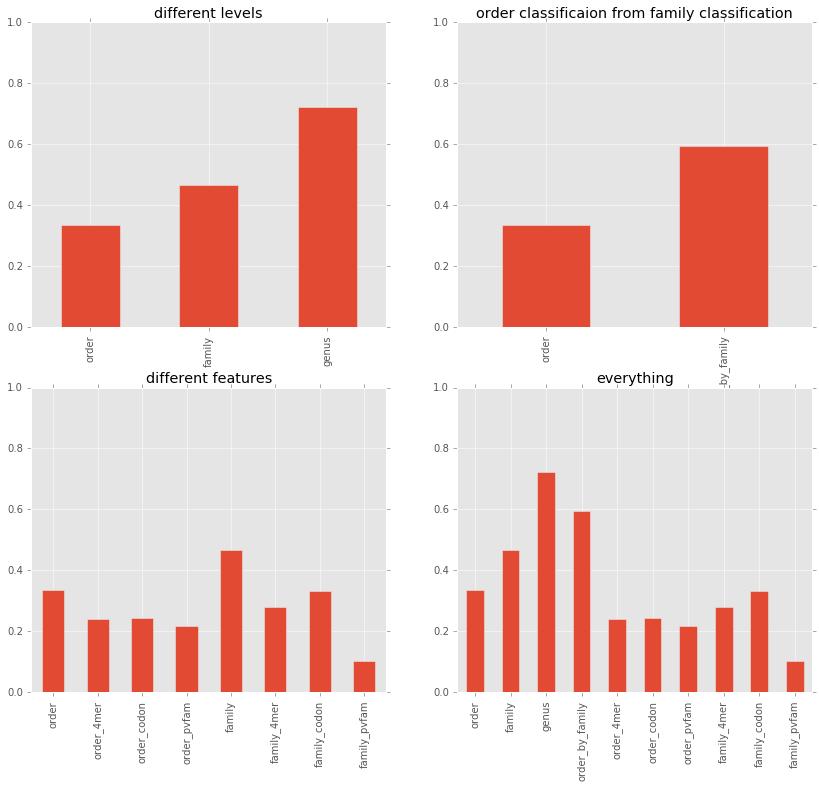

In [78]:
fig, ax = plt.subplots(figsize= (14,12))
ax.set_title('weighted f1 score')
plt.subplot(2, 2, 1)
w_f1_level.plot.bar(title='different levels',ylim=[0,1])
plt.subplot(2, 2, 2)
w_f1_order_by_family.plot.bar(title='order classificaion from family classification',ylim=[0,1])
plt.subplot(2, 2, 3)
w_f1_feature.plot.bar(title='different features',ylim=[0,1])
plt.subplot(2, 2, 4)
w_f1_all.plot.bar(title='everything',ylim=[0,1])


## Box plots for F1 score using individual F1 scores for each taxonomic groups (order, family, genus)

In [79]:
f1_family = pd.read_csv(work_dir+'/Family/f1_by_label.txt',sep = ' = ',header=None,names=['item','family'],engine='python')
f1_order = pd.read_csv(work_dir+'/Order/f1_by_label.txt',sep = ' = ',header=None,names=['item','order'],engine='python')
f1_genus = pd.read_csv(work_dir+'/Genus/f1_by_label.txt',sep = ' = ',header=None,names=['item','genus'],engine='python')


In [80]:
f1_family_4mer = pd.read_csv(work_dir+'/family_4mers/f1_by_label.txt',sep = ' = ',header=None,names=['item','family_4mer'],engine='python')
f1_family_codon = pd.read_csv(work_dir+'/family_codon/f1_by_label.txt',sep = ' = ',header=None,names=['item','family_codon'],engine='python')
f1_family_pvfam = pd.read_csv(work_dir+'/family_pvfam/f1_by_label.txt',sep = ' = ',header=None,names=['item','family_pvfam'],engine='python')

In [81]:
# modify df to be concated for box plotting

f1_family['item'] = 'family'
f1_order['item'] = 'order'
f1_genus['item'] = 'genus'
f1_family.columns=['level','F1']
f1_order.columns=['level','F1']
f1_genus.columns=['level','F1']
f1_level = pd.concat([f1_order,f1_family,f1_genus])

In [87]:
f1_level.groupby(['level']).describe()

F1
level                    
family count   811.000000
       mean      0.200256
       std       0.260069
       min       0.000000
       25%       0.000000
       50%       0.065041
       75%       0.339484
       max       1.000000
genus  count  1769.000000
       mean      0.247566
       std       0.289999
       min       0.000000
       25%       0.000000
       50%       0.109859
       75%       0.446809
       max       1.000000
order  count   322.000000
       mean      0.170028
       std       0.236742
       min       0.000000
       25%       0.000000
       50%       0.039562
       75%       0.283885
       max       0.948466

OrderedDict([('F1', <matplotlib.axes._subplots.AxesSubplot at 0x115df6e90>)])

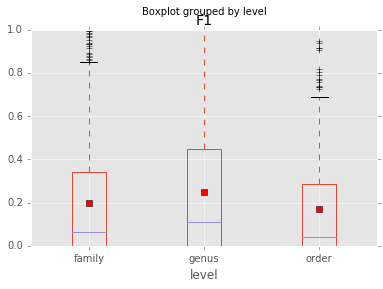

In [63]:
f1_level.boxplot(column=['F1'],by='level',return_type='axes',showmeans=True,positions=[1,2,3])

OrderedDict([('F1', <matplotlib.axes._subplots.AxesSubplot at 0x116234150>)])

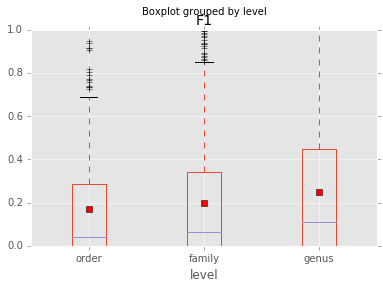

In [68]:
f1_level.boxplot(column=['F1'],by='level',return_type='axes',showmeans=True,positions=[2,3,1])

## Simple figure plotting

In [88]:
w_f1_level_only = result2.loc['Weighted F1 score',['order','family','genus']]

w_f1_feature_only_family = result2.loc['Weighted F1 score',['family','family_4mer','family_codon','family_pvfam']]


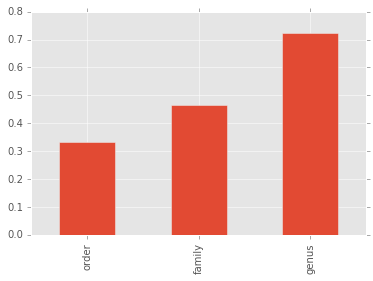

In [117]:
fig = w_f1_level_only.plot.bar()

In [118]:
fig.get_figure().savefig('level.pdf')

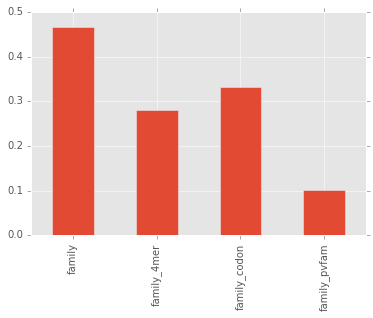

In [119]:
fig = w_f1_feature_only_family.plot.bar()

In [120]:
fig.get_figure().savefig('feature.pdf')

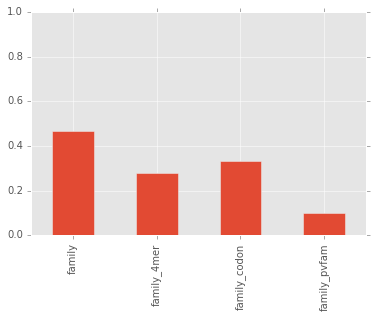

In [121]:
fig = w_f1_feature_only_family.plot.bar(ylim=[0,1])

In [122]:
fig.get_figure().savefig('feature_100.pdf')

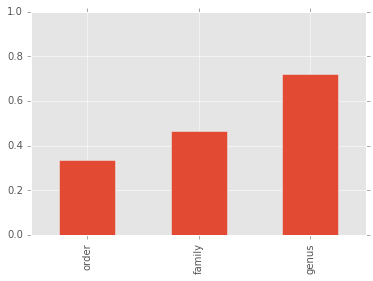

In [123]:
fig = w_f1_level_only.plot.bar(ylim=[0,1])

In [124]:
fig.get_figure().savefig('level_100.pdf')